In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [2]:
make_IDS=pd.read_csv(r"C:\Users\buyre\Downloads\NSL_KDD-master\KDDTrain+.csv")



In [3]:
make_IDS.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [5]:
make_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [7]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = make_IDS.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    make_IDS[i] = d[i].transform(make_IDS[i].fillna('NA'))

In [8]:
make_IDS

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20


In [33]:
make_IDS.describe()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,10.625480,19.504056
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.636094,2.291512
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,18.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,20.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,11.000000,21.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,21.000000


In [40]:
X = make_IDS.iloc[:,1:42]
Y = make_IDS.iloc[:,0]

In [44]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
125967    0
125968    8
125969    0
125970    0
125971    0
Name: 0, Length: 125972, dtype: int64

In [42]:
X

,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal
0,2,44,9,146,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
1,1,49,5,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
2,1,24,9,232,8153,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
3,1,24,9,199,420,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11
4,1,49,1,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,1,49,5,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9
125968,2,49,9,105,145,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11
125969,1,54,9,2231,384,0,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11
125970,1,30,5,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9


In [47]:
make_IDS.groupby(['0']).count()

,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,,,,,,,,,,,,,,,,,,,,,
0,115954,115954,115954,115954,115954,115954,115954,115954,115954,115954,...,115954,115954,115954,115954,115954,115954,115954,115954,115954,115954
1,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989,...,1989,1989,1989,1989,1989,1989,1989,1989,1989,1989
2,843,843,843,843,843,843,843,843,843,843,...,843,843,843,843,843,843,843,843,843,843
3,557,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557
4,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42804,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
42837,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
42862,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
make_IDS.isna().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.17        0
2           0
2.1         0
0.18        0
0.19        0
0.20        0
0.21        0
1           0
0.22        0
0.23        0
150         0
25          0
0.17.1      0
0.03        0
0.17.2      0
0.24        0
0.25        0
0.26        0
0.05        0
0.27        0
normal      0
20          0
dtype: int64

In [11]:
make_IDS.isnull().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.17        0
2           0
2.1         0
0.18        0
0.19        0
0.20        0
0.21        0
1           0
0.22        0
0.23        0
150         0
25          0
0.17.1      0
0.03        0
0.17.2      0
0.24        0
0.25        0
0.26        0
0.05        0
0.27        0
normal      0
20          0
dtype: int64

In [12]:
X=make_IDS.iloc[:,:]

In [13]:
X

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal,20
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9,20
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11,21
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11,18
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9,20


In [48]:
make_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  int32  
 2   ftp_data  125972 non-null  int32  
 3   SF        125972 non-null  int32  
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [57]:
x_train = make_IDS.iloc[:,1:42]

In [65]:
x_train=np.array(x_train)

In [66]:
y_train = np.array(make_IDS['0'])

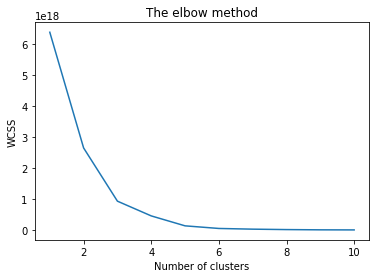

In [67]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [69]:
correct = 0
for i in range(len(x_train)):
    predict_me = np.array(x_train[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_train[i]:
        correct += 1

print(correct/len(x_train))

0.9204743911345379


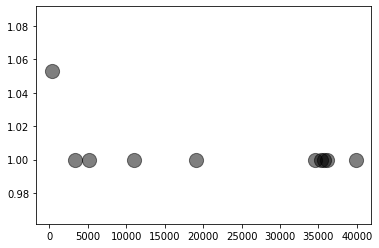

In [70]:
#make_IDS.plot.scatter(x=make_IDS['tcp'],y=make_ids['normal'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [89]:
IDS_test= pd.read_csv(r"C:/Users/buyre/Downloads/NSL_KDD-master/KDDTest+.csv")


In [93]:
IDS_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [94]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = IDS_test.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    IDS_test[i] = d[i].transform(IDS_test[i].fillna('NA'))

In [95]:
IDS_test.describe()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune,21
count,22542.000000,22542.000000,22542.000000,22542.000000,2.254200e+04,2.254200e+04,22542.000000,22542.000000,22542.000000,22542.000000,...,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000,22542.000000
mean,218.878493,1.069958,31.617381,6.874323,1.039637e+04,2.056201e+03,0.000311,0.008429,0.000710,0.105403,...,0.608773,0.090521,0.132242,0.019640,0.097822,0.099435,0.233348,0.226659,15.687073,18.018366
std,1407.237528,0.397001,14.293691,3.209946,4.728074e+05,2.122023e+04,0.017620,0.142605,0.036475,0.928469,...,0.435674,0.220705,0.306258,0.085397,0.273149,0.281877,0.387212,0.400857,6.934407,4.269754
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,17.000000
50%,0.000000,1.000000,22.000000,9.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,...,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,20.000000
75%,0.000000,1.000000,45.000000,9.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,16.000000,21.000000
max,57715.000000,2.000000,62.000000,10.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.000000,21.000000


In [96]:
print(IDS_test.isna())
print('\n',IDS_test.isna().sum())
print('\n\n\n')
print(IDS_test.isnull())
print('\n',IDS_test.isnull().sum())


           0    tcp  private    REJ    0.1    0.2    0.3    0.4    0.5    0.6  \
0      False  False    False  False  False  False  False  False  False  False   
1      False  False    False  False  False  False  False  False  False  False   
2      False  False    False  False  False  False  False  False  False  False   
3      False  False    False  False  False  False  False  False  False  False   
4      False  False    False  False  False  False  False  False  False  False   
...      ...    ...      ...    ...    ...    ...    ...    ...    ...    ...   
22537  False  False    False  False  False  False  False  False  False  False   
22538  False  False    False  False  False  False  False  False  False  False   
22539  False  False    False  False  False  False  False  False  False  False   
22540  False  False    False  False  False  False  False  False  False  False   
22541  False  False    False  False  False  False  False  False  False  False   

       ...  0.04.1  0.06.1 

In [130]:
x_test= IDS_test.iloc[:,0:43]

In [121]:
x_test = np.array(x_test)

In [131]:
y_test = IDS_test['0']

In [132]:
x_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune,21
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,14,21
1,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,16,21
2,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,24,15
3,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,11
4,0,1,22,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22537,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,16,21
22538,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,16,21
22539,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22540,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,16,21


In [133]:
# Confusion matrix from the predictions!

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#find the predictions
y_pred = kmeans.predict(x_test)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print("\n\nClassification Report\n", classification_report(y_test,y_pred))

Confusion Matrix
 [[19016     0     0 ...     0     0     0]
 [  587     0     0 ...     0     0     0]
 [  103     0     0 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


Classification Report
               precision    recall  f1-score   support

           0       0.84      1.00      0.92     19016
           1       0.00      0.00      0.00       587
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       120
           4       0.00      0.00      0.00       539
           5       0.00      0.00      0.00       146
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00 

C:\Users\buyre\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
